In [ ]:
# Imports

from piecewise_fun import PieceFunction as pf, PiecewiseFunction as pwf
import numpy as np
from rand_pwf import random_piecewise_funct

In [1]:
f1 = pf(0,1, (False, True), "3*x")
f2 = pf(1,3, (False, False), "10")
f3 = pf(3,6, (False, True), "3-2*x")

3
f(x)=3*x, x in (0,1]


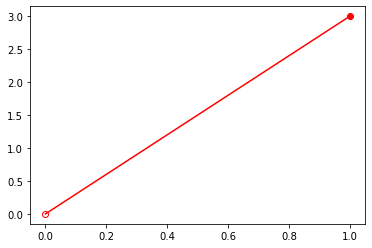

3
0


In [2]:
print(f1.eval(1))
f1.report_f()
print(f1.get_max())
print(f1.get_min())

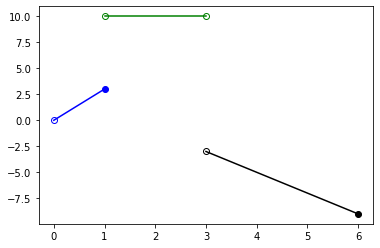

f(4) = -5
[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
]
The max value is: 10 from <f(x)=10, x in (1,3)> PieceFunction
(10, 1)
The min value is: -9 from <f(x)=3-2*x, x in (3,6]> PieceFunction
(-9, 2)


In [3]:
f_list = pwf([f1, f2, f3])

f_list.plot()
print("f(4) = "+str(f_list.eval(4)))
print(f_list)
print(f_list.get_max(True))
print(f_list.get_min(True))

[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3-2*x, x in (3,6]
f(x)=3*x, x in (6,10]
]


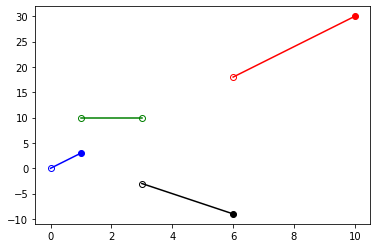

In [4]:
f4 = pf(6, 10, (False, True), "3*x")

# Add the newly created function
f_list.add_fun(f4)
# The new Piecewise function
f_list.report_f()

The number of functions inside Piecewise is: 4
[
f(x)=3*x, x in (0,1]
f(x)=10, x in (1,3)
f(x)=3*x, x in (6,10]
]


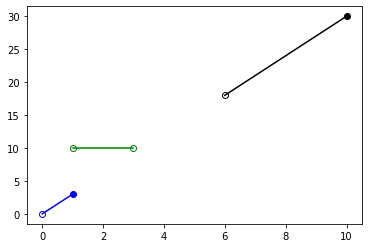

In [5]:
print("The number of functions inside Piecewise is: "+str(len(f_list)))

# Remove the last function
f_list.remove_fun(2)

# The new Piecewise function
f_list.report_f()

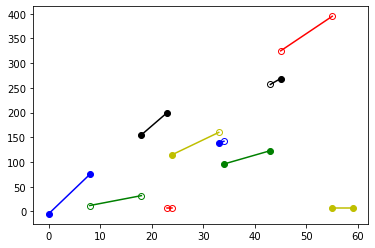

[
f(x)=10*x+-5, x in [0,8]
f(x)=2*x+-4, x in (8,18)
f(x)=9*x+-7, x in [18,23]
f(x)=6, x in (23,24)
f(x)=5*x+-5, x in [24,33)
f(x)=4*x+6, x in [33,34)
f(x)=3*x+-6, x in [34,43]
f(x)=6*x+-1, x in (43,45]
f(x)=7*x+10, x in (45,55)
f(x)=6, x in [55,59]
]


In [12]:
# Create a PiecewiseFunction which contains 10 randomly created constant/linear functions
fun_list=random_piecewise_funct(int, 10, fun_type="random")

fun_list.plot()
print(fun_list)


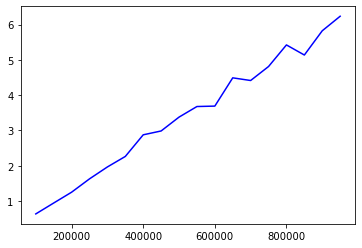

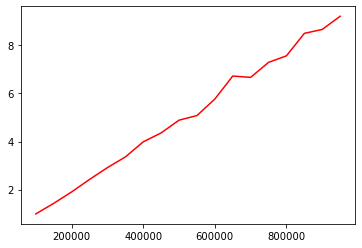

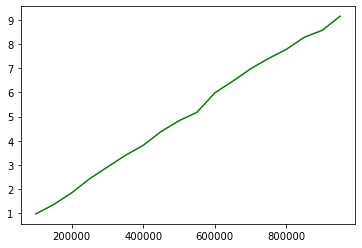

In [13]:
import time
from matplotlib import pyplot as plt

construction_times = []
min_times = []
max_times = []
function_num = list(range(100000,1000000,50000))
for i in function_num:
    start = time.time()
    f = random_piecewise_funct(int, i, max_limit=100)
    end = time.time()
    construction_times.append(end-start)
    start = time.time()
    f.get_min()
    end = time.time()
    min_times.append(end-start)
    start = time.time()
    f.get_max()
    end = time.time()
    max_times.append(end-start)

plt.plot(function_num, construction_times, color="blue")
plt.show()
plt.plot(function_num, min_times, color="red")
plt.show()
plt.plot(function_num, max_times, color="green")
plt.show()